# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set()

# Get data

In [3]:
df=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\data-labs-oct\module-2\lab-intro-to-scipy\ks-projects-201801.csv')

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Is there any point of using the "usd pledged" column?

In [75]:
df[df.usd_pledged_real<df['usd pledged']].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91
30,1000115172,Daily Brew Coffee,Food Trucks,Food,GBP,2015-03-31,3500.0,2015-03-01 18:06:32,21.00,failed,1,GB,32.42,31.09,5181.12
32,1000120151,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.00,successful,18,AU,1473.62,1427.35,1427.35
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# I want to predict the state of the project!

## What columns I am allowed to use?
1. Name
2. Category
3. Main Category
4. Currency
5. Deadline
6. Goal
7. Launched
8. STATE
9. Country

# Data Preparation

In [7]:
df.describe().applymap(round)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661,378661,378661,378661,374864,378661,378661
mean,1074731192,49081,9683,106,7037,9059,45454
std,619086204,1183391,95636,907,78640,90973,1152950
min,5971,0,0,0,0,0,0
25%,538263516,2000,30,2,17,31,2000
50%,1075275634,5200,620,12,395,624,5500
75%,1610148624,16000,4076,56,3034,4050,15500
max,2147476221,100000000,20338986,219382,20338986,20338986,166361391


In [8]:
df.state.value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

In [9]:
df1=df[df.state.isin(['failed','successful'])]

In [10]:
df1.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [11]:
crosstab_df=pd.crosstab(df1.main_category,df1.state, normalize='index').round(1)

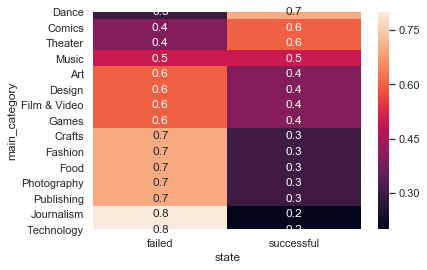

In [12]:
sns.heatmap(pd.crosstab(df1.main_category,df1.state, normalize='index').round(1).sort_values(by='successful', ascending=False),annot=True)

In [13]:
df1.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [14]:
crosstab_currency=pd.crosstab(df1.currency,df1.state)
crosstab_currency['success_rate']=(crosstab_currency.successful/crosstab_currency.sum(axis=1)).round(2)
crosstab_currency.sort_values(by='success_rate')

state,failed,successful,success_rate
currency,,,
EUR,10496,3882,0.27
MXN,1015,396,0.28
NOK,421,163,0.28
CHF,465,187,0.29
AUD,4610,2011,0.30
JPY,16,7,0.30
CAD,8238,4137,0.33
SEK,1001,509,0.34
NZD,826,448,0.35


In [15]:
df1.launched=pd.to_datetime(df1.launched)
df1.deadline=pd.to_datetime(df1.deadline)


C:\Users\eldiy\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1['duration']=(df1.deadline-df1.launched).dt.days

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0244A940>,
      dtype=object)

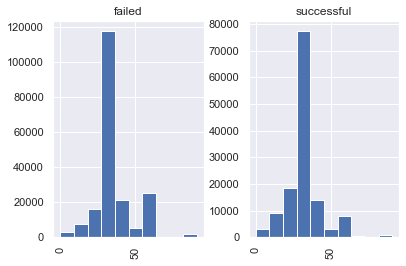

In [17]:
df1.duration.hist(by=df1.state)

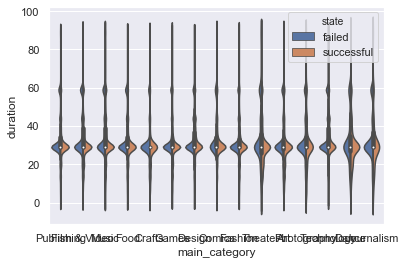

In [18]:
sns.violinplot(split=True,x='main_category',hue='state',y='duration',data=df1)

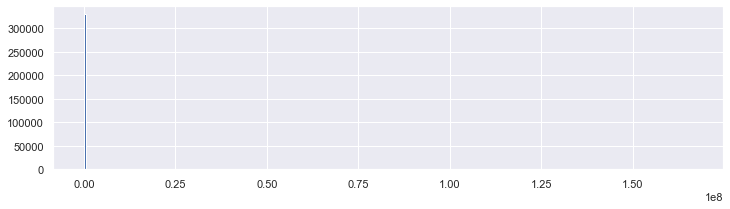

In [19]:
df1.usd_goal_real.hist(bins=300, figsize=(12,3))

In [20]:
df1.usd_goal_real.max()

166361390.71

In [21]:
df1[df1.usd_goal_real>1000000].state.value_counts()

failed        829
successful     11
Name: state, dtype: int64

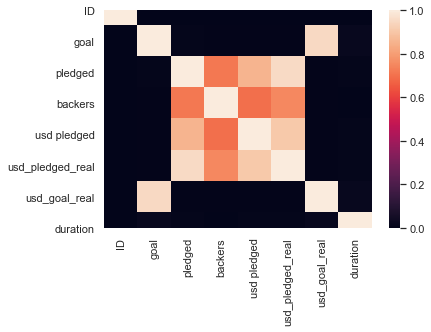

In [22]:
sns.heatmap(df1.corr())

In [23]:
df1.isna().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
duration              0
dtype: int64

In [24]:
df1.drop('usd pledged',axis=1,inplace=True)

C:\Users\eldiy\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1. Name
2. Category
3. Main Category
4. Currency
5. Deadline
6. Goal
7. Launched
8. STATE
9. Country
10. Duration

In [25]:
df1.country.value_counts()
dct={'US':'NA','CA':"NA",'GB':"EU",'DE':'EU','FR':"EU",'NL':'EU','IT':"EU",'ES':'EU','SE':'EU','DK':'EU',
    'NO':'EU','LU':'EU'}
df1.country=df1.country.map(dct).fillna('Other')

In [26]:
X=df1[['main_category','currency','duration','usd_goal_real','country']]

In [27]:
y=df1.state

In [28]:
X=pd.get_dummies(data=X,columns=['main_category','country', 'currency'],drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [31]:
y_test.value_counts()

failed        49744
successful    33175
Name: state, dtype: int64

In [32]:
dct={'failed':0,'successful':1}
y_train=y_train.map(dct)
y_test=y_test.map(dct)

In [33]:
y_test.value_counts()

0    49744
1    33175
Name: state, dtype: int64

# Building the model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [35]:
model1=LogisticRegression().fit(X_train,y_train)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
y_pred_1=model1.predict(X_test)

In [37]:
metrics.confusion_matrix(y_test,y_pred_1)

array([[49744,     0],
       [33175,     0]], dtype=int64)

In [38]:
y_pred_0=model1.predict(X_train)
metrics.confusion_matrix(y_train,y_pred_0)

array([[147975,      0],
       [100781,      0]], dtype=int64)

# Compare with other

In [39]:
model2=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_2=model2.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_2)

array([[37073, 12671],
       [18278, 14897]], dtype=int64)

In [40]:
y_pred_proba_2=model2.predict_proba(X_test)[::,1]

0.6250668220081088


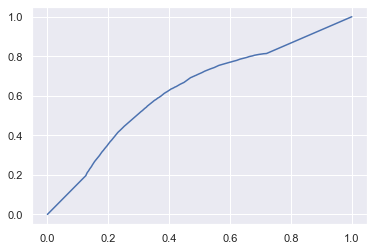

In [41]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba_2)
auc=metrics.roc_auc_score(y_test,y_pred_proba_2)
plt.plot(fpr,tpr)
print(auc)

# Compare with a lot of them

In [42]:
model_list=[LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),XGBClassifier()]

In [43]:
l_acc=[]
l_cm=[]
for model in model_list:
    model2=model.fit(X=X_train,y=y_train)
    y_pred_2=model2.predict(X_test)
    l_acc.append(metrics.accuracy_score(y_test,y_pred_2))
    l_cm.append(metrics.confusion_matrix(y_test,y_pred_2))

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
pd.DataFrame([model_list,l_acc]).T.sort_values(by=1)

,0,1
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.433495
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.599911
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.616023
4,"DecisionTreeClassifier(class_weight=None, crit...",0.62719
1,"(DecisionTreeClassifier(class_weight=None, cri...",0.632135
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.662418


In [45]:
pd.DataFrame([model_list,l_acc]).T.sort_values(by=1)

,0,1
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.433495
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.599911
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.616023
4,"DecisionTreeClassifier(class_weight=None, crit...",0.62719
1,"(DecisionTreeClassifier(class_weight=None, cri...",0.632135
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.662418


# transform the data

In [46]:
X.usd_goal_real=X.usd_goal_real.apply(np.log)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
l_acc=[]
l_cm=[]
for model in model_list:
    model2=model.fit(X_train,y_train)
    y_pred_2=model2.predict(X_test)
    l_acc.append(metrics.accuracy_score(y_test,y_pred_2))
    l_cm.append(metrics.confusion_matrix(y_test,y_pred_2))

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\eldiy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-33cce0d98f99>", line 5, in <module>
    model2=model.fit(X_train,y_train)
  File "C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\neighbors\base.py", line 917, in fit
    return self._fit(X)
  File "C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\neighbors\base.py", line 257, in _fit
    **self.effective_metric_params_)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\eldiy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent 

KeyboardInterrupt: 

In [134]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# We obtained the best - XGBoost. Lets make it even better

In [47]:
from scipy.stats import uniform, randint

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [49]:
params={
    'booster':['gbtree','gblinear'],
    'colsample_bytree':uniform(0.7,0.3),
    'gamma':uniform(0,0.3),
    'learning_rate':uniform(0.03,0.3),
    'max_depth':randint(2,6),
    'n_estimators':randint(10,20),
    'subsample':uniform(0.6,0.4)
}

In [51]:
xgb_model=XGBClassifier()
search=RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, n_jobs=-1 ,return_train_score=True)

In [76]:
xgb_model.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])

# Dask lets us to show the progressbar. So lets use it's version of randomizedsearchcv as well (cross validation)

In [52]:
from dask.diagnostics import ProgressBar

In [54]:
!pip install dask_ml

In [55]:
import dask_ml.model_selection as dcv
clf = dcv.RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, n_jobs=-1 ,return_train_score=True)

In [56]:
with ProgressBar():
    clf.fit(X_train,y_train)

[########################################] | 100% Completed |  7min 48.2s
[########################################] | 100% Completed |  6.2s


In [70]:
best_model=clf.best_estimator_.fit(X_train,y_train)

In [73]:
y_pred_XGBoost=best_model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred_XGBoost)

array([[40519,  9225],
       [18730, 14445]], dtype=int64)

0.7087930114772412


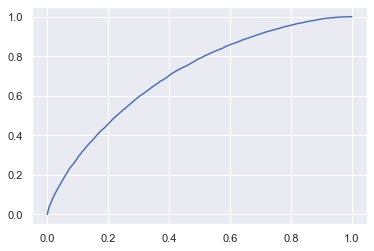

In [74]:
y_pred_proba_XGBoost=best_model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba_XGBoost)
auc=metrics.roc_auc_score(y_test,y_pred_proba_XGBoost)
plt.plot(fpr,tpr)
print(auc)

Best model for XGBoost showed the best results (in comparison to others in terms of AUC and ROC curve)